In [2]:
import rasterio as rio
import numpy as np
from rasterio.plot import show
from rasterio.windows import Window
import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Example of how to calculate NDVI

In [10]:
filename = '../data/GlobalFire2016/Global_fire_atlas_duration_monthly_2016.tif'
# filename = '../data/Global_fire_atlas_dircrop.tif'
data = rio.open(filename)

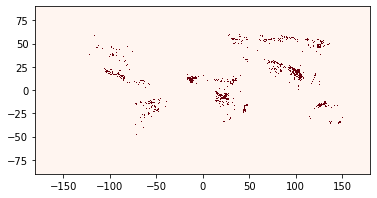

In [11]:
show((data, 4), cmap='Reds')

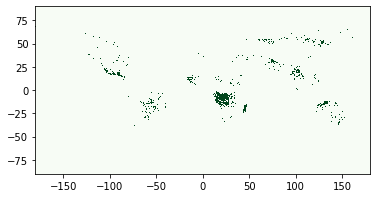

In [4]:
show((data, 5), cmap='Greens')

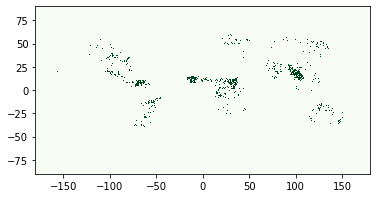

In [5]:
show((data, 3), cmap='Greens')

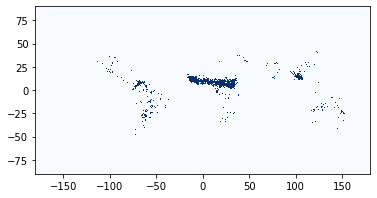

In [6]:
show((data, 1), cmap='Blues')

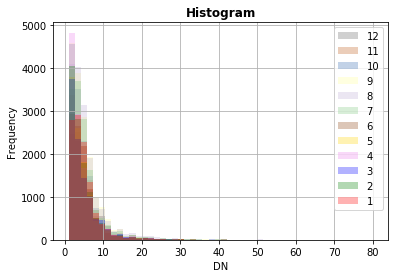

In [7]:
from rasterio.plot import show_hist

show_hist(data, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")

In [8]:
# read all the red
red = data.read(4)

In [9]:
# read the near-infrared
nir = data.read(5)

In [10]:
# display the red array
red

array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],
      dtype=float32)

In [11]:
# display the near-infrared array
nir

array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],
      dtype=float32)

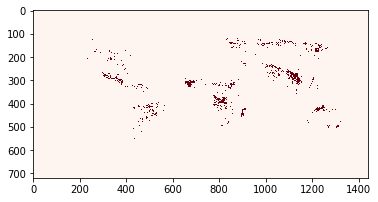

In [12]:
# display red
# show(red)
show(red, cmap='Reds')

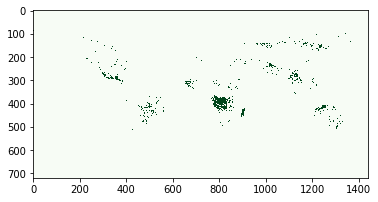

In [13]:
# display nir
show(nir, cmap="Greens")

In [14]:
# display nir type
type(nir)

numpy.ndarray

In [15]:
# display red type
type(red)

numpy.ndarray

In [16]:
# red = red.astype(float)

In [17]:
# nir = nir.astype(float)

In [18]:
# nir

In [19]:
# red

In [20]:
# ignore warning, allowing to divide by 0
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [21]:
ndvi = np.empty(data.shape, dtype=rio.float32)

In [22]:
check = np.logical_or ( red > 0, nir > 0 )

In [23]:
ndvi = np.where ( check,  (nir - red ) / ( nir + red ), -999 )

In [24]:
ndvi

array([[-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.],
       ...,
       [-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.]], dtype=float32)

In [25]:
ndvi.mean()

-982.36

In [26]:
ndvi.std()

127.85896

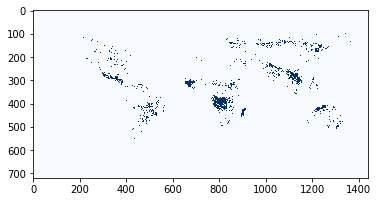

In [28]:
show(ndvi, cmap='Blues')

In [ ]:
data = rio.open('../toydata/fireid.tif')
data

In [ ]:
data.shape

In [ ]:
show(data)

In [ ]:
print(data.profile)

In [ ]:
datadir = rio.open('../toydata/Global_fire_atlas_dircrop.tif')
show(datadir)

In [ ]:
print(datadir.profile)

In [ ]:
datadir = rio.open('../toydata/Global_fire_atlas_dircrop.tif')
show(datadir)

In [ ]:
# open file

# filepath = 'http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/LC08_L1TP_042034_20170616_20170629_01_T1_B4.TIF'
# with rio.open(filepath) as src:
#     print(src.profile)
    
# dimg = rio.open('../data/SatImage/LC08_L1TP_042034_20170616_20170629_01_T1_B4.tiff')
# print(dimg.profile)

In [ ]:
filepath = 'http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/LC08_L1TP_042034_20170616_20170629_01_T1_B4.TIF'

with rio.open(filepath) as file:
    dimg = file.overviews(1)
    oview = dimg[-1]
    print('Decimation factor= {}'.format(oview))
    thumbnail = file.read(1, out_shape=(1, int(file.height // oview), int(file.width // oview)))

    thumbnail = thumbnail.astype('f4')
    thumbnail[thumbnail==0] = np.nan

In [ ]:
plt.imshow(thumbnail)
plt.colorbar()
plt.title('Overview - Band 4 {}'.format(thumbnail.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')

In [ ]:
dimg

In [ ]:
oview

In [ ]:
show(file)